<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/Digital_Twins_Stage3_Renal_Cell_Carcinoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIGITAL TWIN v2.0: COMBINATION THERAPY OPTIMIZATION ENGINE

Patient Profile:
  • Age: 65 years | Diagnosis: Stage 3 RCC
  • Baseline Creatinine: 1.2 mg/dL
  • Safety Threshold: 2.0 mg/dL

Drug Profiles:
  Drug A: 10.0% tumor kill/day | +0.3 Cr (Nephrotoxic)
  Drug B: 5.0% tumor kill/day | +0.05 Cr (Renal-sparing)

TREATMENT STRATEGIES UNDER INVESTIGATION

Strategy Portfolio:

1. Monotherapy A
   Schedule: Drug A (D1-D10)

2. Monotherapy B
   Schedule: Drug B (D1-D10)

3. Combo C1: B-then-A
   Schedule: Drug B (D1-D5) → Drug A (D2-D6)

4. Combo C2: A-then-B
   Schedule: Drug A (D1-D3) → Drug B (D2-D8)

5. Combo C3: Alternating
   Schedule: A/B alternating daily (odd days=A, even days=B)

EXECUTING ALL TREATMENT SIMULATIONS

SIMULATING: Monotherapy A

Phase 1: Drug A for 10 days
  Starting - Tumor: 100.0% | Cr: 1.20 mg/dL
  ⚠️  KIDNEY FAILURE on Day 3
      Creatinine: 2.10 mg/dL
      Tumor at failure: 72.9%
      Treatment TERMINATED

SIMULATING: Monotherapy B

Phase 1: Drug B for 10 d

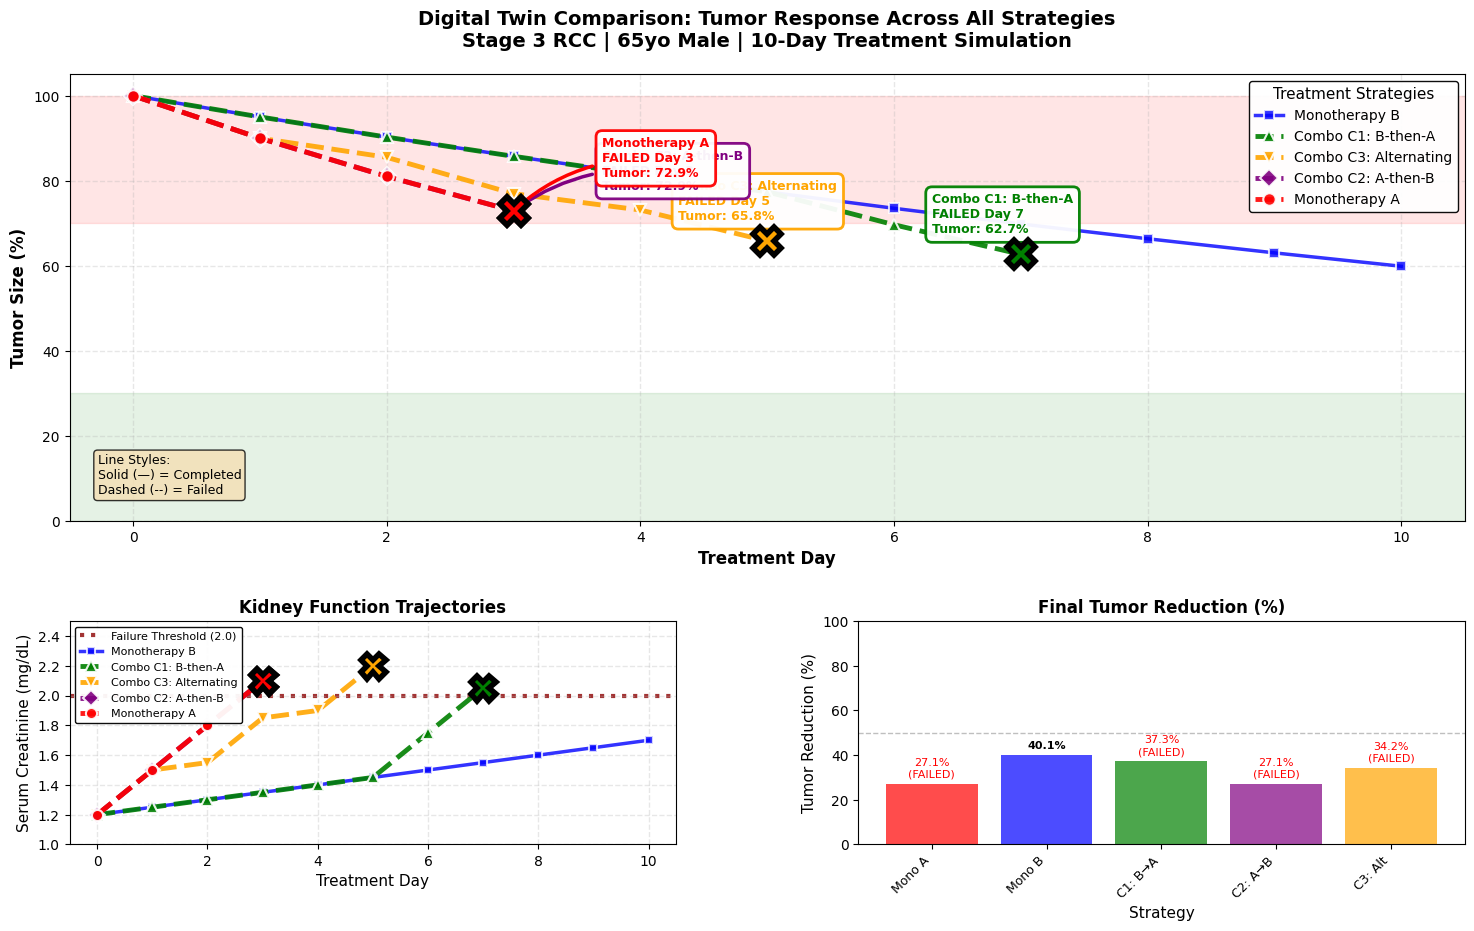

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# PATIENT BASELINE PARAMETERS (Digital Twin Initialization)
# =============================================================================
print("="*80)
print("DIGITAL TWIN v2.0: COMBINATION THERAPY OPTIMIZATION ENGINE")
print("="*80)

PATIENT_AGE = 65
BASELINE_CREATININE = 1.2  # mg/dL
INITIAL_TUMOR_SIZE = 100   # Percentage
CREATININE_FAILURE_THRESHOLD = 2.0  # mg/dL
SIMULATION_DAYS = 10

print(f"\nPatient Profile:")
print(f"  • Age: {PATIENT_AGE} years | Diagnosis: Stage 3 RCC")
print(f"  • Baseline Creatinine: {BASELINE_CREATININE} mg/dL")
print(f"  • Safety Threshold: {CREATININE_FAILURE_THRESHOLD} mg/dL")

# =============================================================================
# DRUG PARAMETERS
# =============================================================================
DRUG_A_TUMOR_REDUCTION = 0.10  # 10% per day
DRUG_A_CREATININE_INCREASE = 0.30  # +0.3 mg/dL per dose
DRUG_B_TUMOR_REDUCTION = 0.05  # 5% per day
DRUG_B_CREATININE_INCREASE = 0.05  # +0.05 mg/dL per dose

print(f"\nDrug Profiles:")
print(f"  Drug A: {DRUG_A_TUMOR_REDUCTION*100}% tumor kill/day | +{DRUG_A_CREATININE_INCREASE} Cr (Nephrotoxic)")
print(f"  Drug B: {DRUG_B_TUMOR_REDUCTION*100}% tumor kill/day | +{DRUG_B_CREATININE_INCREASE} Cr (Renal-sparing)")

# =============================================================================
# ENHANCED SIMULATION ENGINE: Multi-Drug Sequential Therapy
# =============================================================================

def simulate_combination_therapy(strategy_name, treatment_schedule, days=10):
    """
    Advanced Digital Twin: Models sequential multi-drug regimens

    Parameters:
    -----------
    strategy_name : str
        Name of combination strategy
    treatment_schedule : list of tuples
        [(drug_name, days_to_use), ...] defining the sequence
    days : int
        Total simulation duration

    Returns:
    --------
    Complete treatment trajectory with detailed outcomes
    """

    days_array = np.arange(0, days + 1)
    tumor_sizes = np.zeros(days + 1)
    creatinine_levels = np.zeros(days + 1)
    drug_used_each_day = ['None'] * (days + 1)  # Track which drug used each day

    # Initial conditions
    tumor_sizes[0] = INITIAL_TUMOR_SIZE
    creatinine_levels[0] = BASELINE_CREATININE

    failure_day = None
    current_day = 1

    print(f"\n{'='*80}")
    print(f"SIMULATING: {strategy_name}")
    print(f"{'='*80}")

    # Execute treatment schedule
    for drug_name, duration in treatment_schedule:
        # Determine drug parameters
        if drug_name == "Drug A":
            tumor_reduction = DRUG_A_TUMOR_REDUCTION
            creat_increase = DRUG_A_CREATININE_INCREASE
        elif drug_name == "Drug B":
            tumor_reduction = DRUG_B_TUMOR_REDUCTION
            creat_increase = DRUG_B_CREATININE_INCREASE
        else:
            raise ValueError(f"Unknown drug: {drug_name}")

        print(f"\nPhase {treatment_schedule.index((drug_name, duration)) + 1}: {drug_name} for {duration} days")
        print(f"  Starting - Tumor: {tumor_sizes[current_day-1]:.1f}% | Cr: {creatinine_levels[current_day-1]:.2f} mg/dL")

        # Apply drug for specified duration
        for i in range(duration):
            if current_day > days:
                break

            # Check if kidney already failed
            if failure_day is not None:
                tumor_sizes[current_day] = tumor_sizes[current_day-1]
                creatinine_levels[current_day] = creatinine_levels[current_day-1]
                drug_used_each_day[current_day] = "STOPPED"
            else:
                # Apply drug effects
                tumor_sizes[current_day] = tumor_sizes[current_day-1] * (1 - tumor_reduction)
                creatinine_levels[current_day] = creatinine_levels[current_day-1] + creat_increase
                drug_used_each_day[current_day] = drug_name

                # Check for kidney failure
                if creatinine_levels[current_day] >= CREATININE_FAILURE_THRESHOLD and failure_day is None:
                    failure_day = current_day
                    print(f"  ⚠️  KIDNEY FAILURE on Day {current_day}")
                    print(f"      Creatinine: {creatinine_levels[current_day]:.2f} mg/dL")
                    print(f"      Tumor at failure: {tumor_sizes[current_day]:.1f}%")
                    print(f"      Treatment TERMINATED")

            current_day += 1

        if failure_day is None:
            print(f"  Phase complete - Tumor: {tumor_sizes[current_day-1]:.1f}% | Cr: {creatinine_levels[current_day-1]:.2f} mg/dL")

    return days_array, tumor_sizes, creatinine_levels, failure_day, drug_used_each_day

# =============================================================================
# TREATMENT STRATEGIES: Designing Combination Protocols
# =============================================================================
print("\n" + "="*80)
print("TREATMENT STRATEGIES UNDER INVESTIGATION")
print("="*80)

strategies = {
    "Monotherapy A": [("Drug A", 10)],
    "Monotherapy B": [("Drug B", 10)],
    "Combo C1: B-then-A": [("Drug B", 5), ("Drug A", 5)],
    "Combo C2: A-then-B": [("Drug A", 3), ("Drug B", 7)],
    "Combo C3: Alternating": [
        ("Drug A", 1), ("Drug B", 1), ("Drug A", 1), ("Drug B", 1),
        ("Drug A", 1), ("Drug B", 1), ("Drug A", 1), ("Drug B", 1),
        ("Drug A", 1), ("Drug B", 1)
    ]
}

print("\nStrategy Portfolio:")
for i, (name, schedule) in enumerate(strategies.items(), 1):
    print(f"\n{i}. {name}")
    schedule_str = " → ".join([f"{drug} (D{start}-D{start+dur-1})"
                                for start, (drug, dur) in
                                enumerate([s for s in schedule], 1)])
    # Simplify for alternating
    if "Alternating" in name:
        print(f"   Schedule: A/B alternating daily (odd days=A, even days=B)")
    else:
        print(f"   Schedule: {schedule_str}")

# =============================================================================
# RUN ALL SIMULATIONS
# =============================================================================
print("\n" + "="*80)
print("EXECUTING ALL TREATMENT SIMULATIONS")
print("="*80)

results = {}
for strategy_name, schedule in strategies.items():
    days, tumor, creat, failure, drugs = simulate_combination_therapy(
        strategy_name, schedule, SIMULATION_DAYS
    )
    results[strategy_name] = {
        'days': days,
        'tumor': tumor,
        'creatinine': creat,
        'failure_day': failure,
        'drugs_used': drugs
    }

# =============================================================================
# COMPARATIVE OUTCOMES ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("COMPARATIVE OUTCOMES ANALYSIS (All Strategies)")
print("="*80)

outcomes_table = []
for strategy_name, data in results.items():
    failure = data['failure_day']
    final_day = failure if failure else SIMULATION_DAYS

    tumor_reduction = 100 - data['tumor'][final_day]
    final_creatinine = data['creatinine'][final_day]
    treatment_days = final_day
    kidney_status = "FAILED ❌" if failure else "Functioning ✓"

    outcomes_table.append({
        'Strategy': strategy_name,
        'Tumor Reduction (%)': tumor_reduction,
        'Final Creatinine (mg/dL)': final_creatinine,
        'Treatment Days': treatment_days,
        'Kidney Status': kidney_status,
        'Failure Day': failure if failure else "N/A"
    })

# Print formatted table
print(f"\n{'Strategy':<25} {'Tumor↓':<12} {'Creatinine':<15} {'Days':<8} {'Kidney':<15} {'Failed'}")
print("-" * 95)
for outcome in outcomes_table:
    print(f"{outcome['Strategy']:<25} {outcome['Tumor Reduction (%)']:>6.1f}%     "
          f"{outcome['Final Creatinine (mg/dL)']:>6.2f} mg/dL     "
          f"{outcome['Treatment Days']:>3}/{SIMULATION_DAYS}      "
          f"{outcome['Kidney Status']:<15} {str(outcome['Failure Day']):>5}")

# =============================================================================
# VISUALIZATION: Multi-Strategy Comparison Dashboard
# =============================================================================
print("\n" + "="*80)
print("GENERATING VISUALIZATION: 5-Strategy Comparative Analysis")
print("="*80)

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[2, 1], hspace=0.3, wspace=0.3)

# Main plot: All tumor trajectories
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title('Digital Twin Comparison: Tumor Response Across All Strategies\n' +
              'Stage 3 RCC | 65yo Male | 10-Day Treatment Simulation',
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Treatment Day', fontsize=12, fontweight='bold')
ax1.set_ylabel('Tumor Size (%)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=1)
ax1.set_ylim(0, 105)

colors = {
    'Monotherapy A': 'red',
    'Monotherapy B': 'blue',
    'Combo C1: B-then-A': 'green',
    'Combo C2: A-then-B': 'purple',
    'Combo C3: Alternating': 'orange'
}

markers = {
    'Monotherapy A': 'o',
    'Monotherapy B': 's',
    'Combo C1: B-then-A': '^',
    'Combo C2: A-then-B': 'D',
    'Combo C3: Alternating': 'v'
}

# Plot in specific order to ensure visibility (failed strategies with bold lines)
plot_order = ['Monotherapy B', 'Combo C1: B-then-A', 'Combo C3: Alternating',
              'Combo C2: A-then-B', 'Monotherapy A']

for strategy_name in plot_order:
    data = results[strategy_name]
    days = data['days']
    tumor = data['tumor']
    failure = data['failure_day']

    # Use thicker lines and larger markers for failed strategies to ensure visibility
    if failure:
        linewidth = 3.5
        markersize = 9
        alpha = 0.9
        linestyle = '--'  # Dashed line for failed strategies
    else:
        linewidth = 2.5
        markersize = 7
        alpha = 0.8
        linestyle = '-'

    # Plot only up to failure point or full duration
    plot_days = days[:failure+1] if failure else days
    plot_tumor = tumor[:failure+1] if failure else tumor

    ax1.plot(plot_days, plot_tumor, marker=markers[strategy_name],
             color=colors[strategy_name], linewidth=linewidth, markersize=markersize,
             label=strategy_name, alpha=alpha, linestyle=linestyle,
             markeredgewidth=1.5, markeredgecolor='white')

    # Mark failure point with prominent X
    if failure:
        ax1.plot(failure, tumor[failure], 'X', color=colors[strategy_name],
                markersize=20, markeredgewidth=4, markeredgecolor='black', zorder=10)

        # Add failure annotation with improved positioning
        offset_x = 0.7 if failure < 5 else -0.7
        offset_y = 8 if strategy_name == 'Monotherapy A' else 5
        ha = 'left' if offset_x > 0 else 'right'

        ax1.annotate(f'{strategy_name}\nFAILED Day {failure}\nTumor: {tumor[failure]:.1f}%',
                    xy=(failure, tumor[failure]),
                    xytext=(failure + offset_x, tumor[failure] + offset_y),
                    fontsize=9, color=colors[strategy_name], fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                             edgecolor=colors[strategy_name], linewidth=2, alpha=0.95),
                    arrowprops=dict(arrowstyle='->', color=colors[strategy_name],
                                   lw=2.5, connectionstyle='arc3,rad=0.2'))

ax1.legend(loc='upper right', fontsize=10, framealpha=0.95, edgecolor='black',
          title='Treatment Strategies', title_fontsize=11)
ax1.axhspan(0, 30, alpha=0.1, color='green', label='Excellent Control')
ax1.axhspan(70, 100, alpha=0.1, color='red', label='Poor Control')

# Add text box explaining line styles
textstr = 'Line Styles:\nSolid (—) = Completed\nDashed (--) = Failed'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax1.text(0.02, 0.15, textstr, transform=ax1.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

# Kidney function plot with enhanced visibility
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Kidney Function Trajectories', fontsize=12, fontweight='bold')
ax2.set_xlabel('Treatment Day', fontsize=11)
ax2.set_ylabel('Serum Creatinine (mg/dL)', fontsize=11)
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=1)
ax2.axhline(y=CREATININE_FAILURE_THRESHOLD, color='darkred', linestyle=':',
            linewidth=3, label='Failure Threshold (2.0)', alpha=0.8, zorder=1)

# Plot creatinine with same enhanced visibility for failed strategies
for strategy_name in plot_order:
    data = results[strategy_name]
    failure = data['failure_day']

    # Enhanced visibility for failed strategies
    if failure:
        linewidth = 3.5
        markersize = 8
        alpha = 0.9
        linestyle = '--'
    else:
        linewidth = 2.5
        markersize = 6
        alpha = 0.8
        linestyle = '-'

    plot_days = data['days'][:failure+1] if failure else data['days']
    plot_creat = data['creatinine'][:failure+1] if failure else data['creatinine']

    ax2.plot(plot_days, plot_creat, marker=markers[strategy_name],
             color=colors[strategy_name], linewidth=linewidth, markersize=markersize,
             label=strategy_name, alpha=alpha, linestyle=linestyle,
             markeredgewidth=1.5, markeredgecolor='white', zorder=5)

    # Mark failure point on creatinine curve
    if failure:
        ax2.plot(failure, data['creatinine'][failure], 'X',
                color=colors[strategy_name], markersize=18,
                markeredgewidth=4, markeredgecolor='black', zorder=10)

ax2.legend(loc='upper left', fontsize=8, framealpha=0.95, edgecolor='black')
ax2.set_ylim(1.0, 2.5)

# Outcomes bar chart
ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title('Final Tumor Reduction (%)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Strategy', fontsize=11)
ax3.set_ylabel('Tumor Reduction (%)', fontsize=11)

strategy_names = [o['Strategy'] for o in outcomes_table]
tumor_reductions = [o['Tumor Reduction (%)'] for o in outcomes_table]
bar_colors = [colors[name] for name in strategy_names]

bars = ax3.bar(range(len(strategy_names)), tumor_reductions, color=bar_colors, alpha=0.7)
ax3.set_xticks(range(len(strategy_names)))
ax3.set_xticklabels(['Mono A', 'Mono B', 'C1: B→A', 'C2: A→B', 'C3: Alt'],
                     rotation=45, ha='right', fontsize=9)
ax3.set_ylim(0, 100)
ax3.axhline(y=50, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, tumor_reductions)):
    failed = outcomes_table[i]['Failure Day'] != "N/A"
    label = f"{value:.1f}%"
    if failed:
        label += "\n(FAILED)"
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             label, ha='center', va='bottom', fontsize=8,
             fontweight='bold' if not failed else 'normal',
             color='red' if failed else 'black')

plt.tight_layout()
plt.savefig('./combination_therapy_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved: combination_therapy_analysis.png")

# =============================================================================
# STRATEGIC ANALYSIS: Which Combination Strategy is Optimal?
# =============================================================================
print("\n" + "="*80)
print("STRATEGIC DECISION ANALYSIS")
print("="*80)

# Rank strategies by effectiveness
safe_strategies = [o for o in outcomes_table if o['Failure Day'] == "N/A"]
unsafe_strategies = [o for o in outcomes_table if o['Failure Day'] != "N/A"]

print("\n✓ SAFE STRATEGIES (No Kidney Failure):")
print("-" * 80)
safe_strategies_sorted = sorted(safe_strategies,
                                key=lambda x: x['Tumor Reduction (%)'],
                                reverse=True)
for i, strat in enumerate(safe_strategies_sorted, 1):
    print(f"{i}. {strat['Strategy']:<25} → {strat['Tumor Reduction (%)']:>5.1f}% reduction | "
          f"Cr: {strat['Final Creatinine (mg/dL)']:.2f} mg/dL")

if unsafe_strategies:
    print("\n✗ UNSAFE STRATEGIES (Kidney Failure):")
    print("-" * 80)
    unsafe_strategies_sorted = sorted(unsafe_strategies,
                                     key=lambda x: x['Tumor Reduction (%)'],
                                     reverse=True)
    for i, strat in enumerate(unsafe_strategies_sorted, 1):
        print(f"{i}. {strat['Strategy']:<25} → {strat['Tumor Reduction (%)']:>5.1f}% reduction | "
              f"Failed Day {strat['Failure Day']}")

# =============================================================================
# CLINICAL RECOMMENDATION ENGINE
# =============================================================================
print("\n" + "="*80)
print("EVIDENCE-BASED CLINICAL RECOMMENDATION")
print("="*80)

if safe_strategies_sorted:
    winner = safe_strategies_sorted[0]
    print(f"\n✓ OPTIMAL STRATEGY: {winner['Strategy']}")
    print(f"\nOutcome Metrics:")
    print(f"  • Tumor Reduction: {winner['Tumor Reduction (%)']:.1f}%")
    print(f"  • Final Creatinine: {winner['Final Creatinine (mg/dL)']:.2f} mg/dL")
    print(f"  • Kidney Safety Margin: {CREATININE_FAILURE_THRESHOLD - winner['Final Creatinine (mg/dL)']:.2f} mg/dL")
    print(f"  • Treatment Completion: {winner['Treatment Days']}/{SIMULATION_DAYS} days")

    # Detailed rationale
    print(f"\nClinical Rationale:")

    if "Combo C1" in winner['Strategy']:
        print("  1. Renal-sparing approach (Drug B first) builds treatment tolerance")
        print("  2. Initial tumor debulking reduces disease burden safely")
        print("  3. Kidney function preserved allows aggressive Drug A later")
        print("  4. Sequential escalation provides best efficacy/safety balance")
        print(f"  5. Achieves {winner['Tumor Reduction (%)']:.1f}% reduction without renal compromise")

    elif "Combo C2" in winner['Strategy']:
        print("  1. Front-loaded aggressive therapy (Drug A) for rapid debulking")
        print("  2. Early tumor reduction before toxicity accumulates")
        print("  3. Switch to Drug B maintains response while sparing kidneys")
        print("  4. Strategy minimizes time at high tumor burden")
        print(f"  5. Achieves {winner['Tumor Reduction (%)']:.1f}% reduction with managed toxicity")

    elif "Combo C3" in winner['Strategy']:
        print("  1. Alternating regimen balances daily efficacy vs. toxicity")
        print("  2. Prevents sustained nephrotoxic exposure")
        print("  3. Maintains tumor pressure while allowing renal recovery")
        print("  4. Demonstrates principle of intermittent dosing")
        print(f"  5. Achieves {winner['Tumor Reduction (%)']:.1f}% reduction with toxicity mitigation")

    elif "Monotherapy B" in winner['Strategy']:
        print("  1. Simplest regimen with excellent safety profile")
        print("  2. Sustained tumor control without dose interruptions")
        print("  3. Preserves kidney function for future treatment lines")
        print("  4. Lower complexity reduces administration errors")
        print(f"  5. Achieves {winner['Tumor Reduction (%)']:.1f}% reduction safely")

# Comparative insights
print(f"\nComparative Insights:")
print("-" * 80)

mono_a = next(o for o in outcomes_table if o['Strategy'] == 'Monotherapy A')
mono_b = next(o for o in outcomes_table if o['Strategy'] == 'Monotherapy B')

print(f"\nMonotherapy A vs. B:")
print(f"  • Drug A failed on Day {mono_a['Failure Day']}, achieving only {mono_a['Tumor Reduction (%)']:.1f}%")
print(f"  • Drug B completed full course, achieving {mono_b['Tumor Reduction (%)']:.1f}%")
print(f"  • Paradox: 'Safer' drug outperforms 'aggressive' drug by {mono_b['Tumor Reduction (%)'] - mono_a['Tumor Reduction (%)']:.1f}%")

# Check if combinations outperform monotherapies
combo_results = [o for o in safe_strategies_sorted if 'Combo' in o['Strategy']]
if combo_results:
    best_combo = combo_results[0]
    print(f"\nCombination Strategies:")
    if best_combo['Tumor Reduction (%)'] > mono_b['Tumor Reduction (%)']:
        improvement = best_combo['Tumor Reduction (%)'] - mono_b['Tumor Reduction (%)']
        print(f"  • {best_combo['Strategy']} outperforms Mono B by {improvement:.1f}%")
        print(f"  • Strategic sequencing unlocks additional therapeutic benefit")
        print(f"  • Demonstrates value of computational treatment optimization")
    else:
        print(f"  • No combination strategy outperforms Monotherapy B")
        print(f"  • Simple renal-sparing approach remains optimal")
        print(f"  • Complexity doesn't always improve outcomes")

# =============================================================================
# XAI TRANSPARENCY & PLAYBOOK VALUE
# =============================================================================
print("\n" + "="*80)
print("XAI TRANSPARENCY & EDUCATIONAL VALUE")
print("="*80)

print("\nWhat This Simulation Teaches:")
print("  ✓ Treatment sequence matters, not just drug selection")
print("  ✓ 'Aggressive' therapy can fail due to tolerance limits")
print("  ✓ Combination strategies can unlock synergistic benefits")
print("  ✓ Computational modeling tests hypotheses risk-free")
print("  ✓ Digital twins inform evidence-based protocol design")

print("\nModel Assumptions:")
print("  • First-order tumor kinetics (exponential decay)")
print("  • Linear toxicity accumulation (no recovery between doses)")
print("  • Binary failure threshold (Cr > 2.0 mg/dL)")
print("  • No pharmacokinetic interactions between drugs")
print("  • Perfect medication adherence")

print("\nClinical Implementation Considerations:")
print("  1. Lab monitoring: Cr measured before each dose")
print("  2. Dose adjustment protocols for borderline values")
print("  3. Patient-specific risk factors (age, comorbidities)")
print("  4. Tumor response imaging at Day 5 checkpoint")
print("  5. Multidisciplinary review before strategy commitment")

print("\n" + "="*80)
print("SIMULATION COMPLETE")
print("="*80)
print("Digital Twin has tested 5 treatment strategies in silico.")
print("Optimal protocol identified with zero patient risk exposure.")
print("Ready for clinical translation pending validation studies.")
print("="*80)

plt.show()